In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
RunManagerGCP.get_run_names('LongPeadStrategy')

,Run,RunDate,Completed,Description,Starred
0,run_0025,2017-08-09,True,Version 65,
1,run_0031,2017-08-15,True,Market vars and stats,
2,run_0034,2017-08-16,True,Constructor2 first run,
3,run_0038,2017-08-18,False,Top 800 fixed bug in market data,
4,run_0041,2017-08-21,True,Trees have log2 max features,
5,run_0050,2017-08-28,False,500 estimators,*
6,run_0053,2017-08-29,False,Fewer signal hyperparameters to get full run w...,
7,run_0070,2017-09-14,False,"new response, fewer models, constrained market",
8,run_0072,2017-09-15,False,rerun of sector 20,
9,run_0073,2017-09-15,False,rerun of sector 25,


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2017-11-09 15:58:37.002645


#### Current runs for implementation

In [5]:
runs = [
    'run_0106', 'run_0109', 'run_0110',
    'run_0107', 'run_0112', 'run_0114',
    'run_0108', 'run_0113', 'run_0115',
]

#### Check that all run files are up-to-date

In [6]:
for r in runs:
    run = RunManagerGCP('LongPeadStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0106 - 2017-10-31 00:00:00
run_0109 - 2017-10-31 00:00:00
run_0110 - 2017-10-31 00:00:00
run_0107 - 2017-10-31 00:00:00
run_0112 - 2017-10-31 00:00:00
run_0114 - 2017-10-31 00:00:00
run_0108 - 2017-10-31 00:00:00
run_0113 - 2017-10-31 00:00:00
run_0115 - 2017-10-31 00:00:00


#### Import

In [7]:
drop_params = [('drop_ibes', True)]

combAll = CombinationSearch(gcp_implementation=True, write_flag=True)
for r in runs:
    combAll.add_run(RunManagerGCP('LongPeadStrategy', r, 
                                  test_periods=0, start_year=2009, drop_params=drop_params))

combAll.start(50, criteria='sharpe')

  0%|          | 0/9 [00:00<?, ?it/s]

Reading and aggregating runs...


100%|██████████| 9/9 [01:51<00:00, 11.94s/it]


Finished aggregating runs...


 52%|█████▏    | 26/50 [08:57<09:34, 23.94s/it]

KeyboardInterrupt: 

In [ ]:
combAll.start(150, criteria='sharpe')

 33%|███▎      | 3/9 [00:00<00:00, 18.55it/s]

Reading and aggregating runs...


100%|██████████| 9/9 [00:00<00:00, 36.24it/s]


Finished aggregating runs...


 88%|████████▊ | 132/150 [52:55<07:25, 24.74s/it]

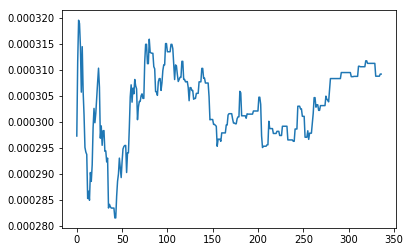

In [19]:
plt.figure()
plt.plot(combAll.epoch_stats.Mean)

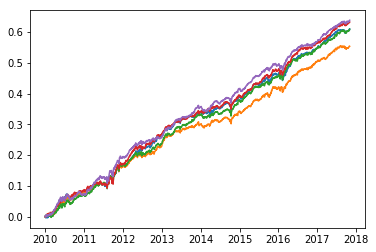

In [20]:
plt.figure()
plt.plot(combAll.best_results_rets.cumsum())